# Notebook for simulating, saving and analysing MOMA-like data for a parameter range

In [1]:
from cells_simulation import *


In [2]:
def write_csv_config(filename):
    with open(filename, "w") as fin:
        fin.write("# Generated config file for simulated data\n")
        fin.write("time_col = time_min  \n")
        fin.write("length_col = log_length_noise \n")
        fin.write("length_islog = true \n")
        fin.write("fp_col = gfp_noise \n")
        fin.write("parent_tags = lane, parent_id \n")
        fin.write("cell_tags = lane, cell_id \n")
        fin.write("rescale_time = 1 \n")

| ==================== | Progress 100%  No of cells:  1


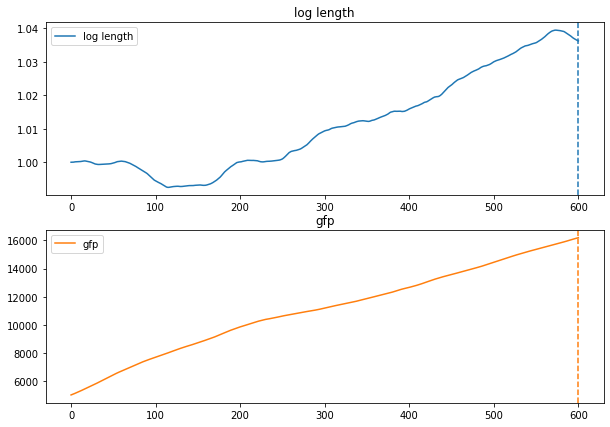

Every 3000 th datapoint is saved
| ==================== | Progress 100%  No of cells:  1


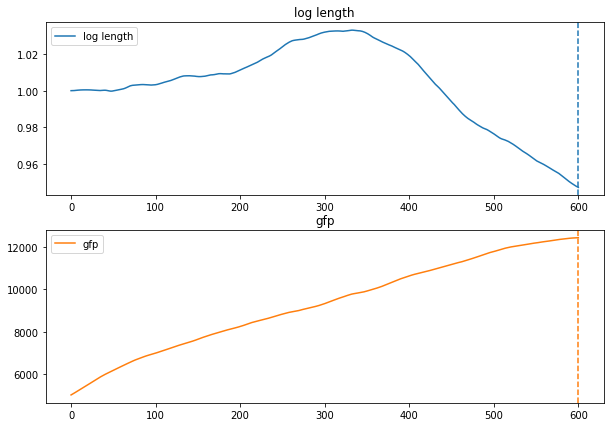

Every 3000 th datapoint is saved
| ==================== | Progress 100%  No of cells:  1


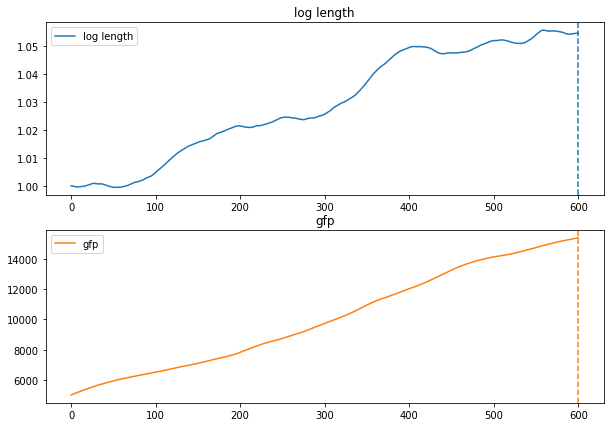

Every 3000 th datapoint is saved
| ==================== | Progress 100%  No of cells:  1


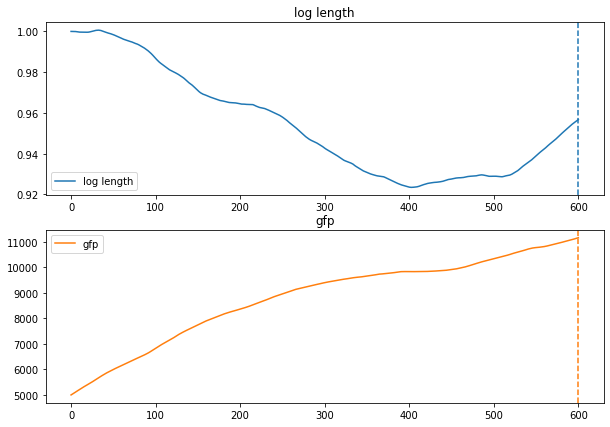

Every 3000 th datapoint is saved
| ==================== | Progress 100%  No of cells:  1


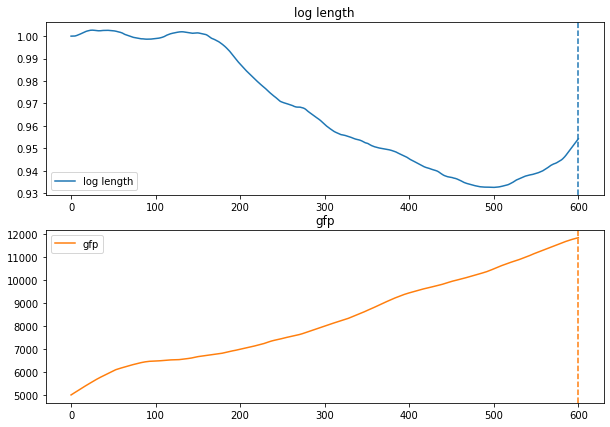

Every 3000 th datapoint is saved


In [3]:
# ========== Simulation parameters ========== #
save_dataset = True    # saves data set as csv
run_ggp = True         # runs the ggp code (located in "../bin/" relative to this nb)

dt = 1e-3
dt_measument = 3 # in minutes
n_cells = 1 # number of cells that will be simulated

div_mode = "timer"

division_log_length = 1+np.log(2)   # for sizer: division, when log_length hits division_log_length
division_time = 600          # for timer: division, when cell cycle time hits division_time
division_addition = np.log(2)       # for adder: divsion, when division_addition in log_length was added in cell cycle


# ========== Model parameters ========== #
parameter_set = {   "mean_lambda": -1e-7, 
                    "gamma_lambda": 0.01,
                    "var_lambda": 1e-9,
                    "mean_q": 20,
                    "gamma_q": 1e-2,
                    "var_q": 0.1,
                    "beta": 1e-3,
                    "var_x": 1e-3, # 1e-3,
                    "var_g": 50000, # 5000,
                    "var_dx": 0.001,
                    "var_dg": 500}

# --------- SIMULATE --------- #
data_dfs=[]
for i in range(5):
    cells_simulated = simulate_cells(dt, n_cells, parameter_set, div_mode,
                            division_log_length, 
                            division_time, 
                            division_addition, log_length0=1, gfp0=5000)
    plot_cells(cells_simulated[:1], n_steps=1)

    data_df = build_data_set(cells_simulated, parameter_set['var_x'], parameter_set['var_g'], int(dt_measument/dt))
    data_df["lane"]=i
    data_dfs.append(data_df)

In [4]:
dataset = pd.concat(data_dfs, sort=False)

In [5]:
dataset

,cell_id,time_min,parent_id,log_length,gfp,lt,qt,log_length_noise,gfp_noise,lane
0,0,0.0,-1,1.000000,5000.000000,-1.000000e-08,10.000000,0.975954,5008.552471,0
1,0,3.0,-1,1.000034,5071.452682,5.287756e-05,10.851283,0.977087,5177.305422,0
2,0,6.0,-1,1.000132,5148.285835,1.710500e-06,11.252393,0.976163,5212.861980,0
3,0,9.0,-1,1.000156,5226.203764,5.268960e-05,11.950384,0.979155,5437.166297,0
4,0,12.0,-1,1.000229,5308.322589,1.346325e-05,12.250552,1.017566,5558.890665,0
...,...,...,...,...,...,...,...,...,...,...
196,0,588.0,-1,0.948246,11723.869705,5.350422e-04,9.235493,0.948895,11660.979151,4
197,0,591.0,-1,0.949792,11758.687279,4.867873e-04,8.904013,0.920152,11797.188466,4
198,0,594.0,-1,0.951222,11788.551626,4.762333e-04,7.715491,0.936191,11938.149638,4
199,0,597.0,-1,0.952697,11816.424274,5.113744e-04,8.512099,0.936649,11658.993334,4


In [6]:
# out_dir = mk_mising_dir('../data/test_new_init')
out_dir = mk_mising_dir('../data_2.0/stalled_n{:d}_{:s}'.format(n_cells, div_mode))

# ----------- SAVE ----------- #
if save_dataset:
    directory, filename = get_next_file_name(out_dir)

    write_param_file(os.path.join(directory, "parameters.txt"), parameter_set, bound_scales=[10, 0], bound_p=["mean_lambda"]) 

    write_csv_config(os.path.join(directory, "csv_config.txt"))
    dataset.to_csv(filename)
    print("New simulation saved in", filename)

    # ----------- RUN ----------- #
    if run_ggp:
        run_cmd = suggest_run_command(directory, filename, modes="-m -p", t=1e-2, add_flag = '-space linear')
        print("run: -> \n", run_cmd)
        s = subprocess.run(run_cmd, capture_output=True, shell=True)
        print(s)

0
force i= 0
New simulation saved in ../data_2.0/stalled_n1_timer/stalled_n1_timer_0/stalled_n1_timer_0.csv
run: -> 
 ../bin/gfp_gaussian -c ../data_2.0/stalled_n1_timer/stalled_n1_timer_0/csv_config.txt -b ../data_2.0/stalled_n1_timer/stalled_n1_timer_0/parameters.txt -t 0.01 -i ../data_2.0/stalled_n1_timer/stalled_n1_timer_0/stalled_n1_timer_0.csv -l 0  -space linear -m -p
CompletedProcess(args='../bin/gfp_gaussian -c ../data_2.0/stalled_n1_timer/stalled_n1_timer_0/csv_config.txt -b ../data_2.0/stalled_n1_timer/stalled_n1_timer_0/parameters.txt -t 0.01 -i ../data_2.0/stalled_n1_timer/stalled_n1_timer_0/stalled_n1_timer_0.csv -l 0  -space linear -m -p', returncode=0, stdout=b'No  Name           Type    Init      Step      Bounds    \n___________________________________________________________________\n0:  mean_lambda    (bound) -1e-08    -5e-09    -1e-07    -0        \n1:  gamma_lambda   (free)  0.01      0.005                         \n2:  var_lambda     (free)  1e-09     5e-10      

In [47]:

# =============== PLOT =============== #
def plot_cells(cells, n_steps=1):
    _, axes = plt.subplots(2, figsize=(5,4))
    ax = axes.ravel()

    for j in range(len(cells[::n_steps])):
        cell = copy.deepcopy(cells[j])
        cell.time = np.array(cell.time)

        if n_steps>1:
            ax[0].set_title("log length (showing every {:d}th cell)".format(n_steps))
            ax[1].set_title("gfp (showing every {:d}th cell)".format(n_steps))

        else:
            ax[0].set_title("log length")
            ax[1].set_title("gfp")

        # ax[0].set_ylim([1.2, 2.2])
        
        if len(cells[::n_steps]) <20:
            ax[0].axvline(cell.time[-1], ls='--', color='tab:blue')
            ax[1].axvline(cell.time[-1], ls='--', color='tab:orange')

        if j ==0:
            ax[0].plot(cell.time, np.array(cell.log_length), label='log length', color='tab:blue')
            ax[1].plot(cell.time, np.array(cell.gfp), color='tab:orange', label='gfp')

        else:
            ax[0].plot(cell.time, np.array(cell.log_length), color='tab:blue')
            ax[1].plot(cell.time, np.array(cell.gfp), color='tab:orange')

    for j in range(2):
        ax[j].legend()
    plt.tight_layout()
    plt.show()


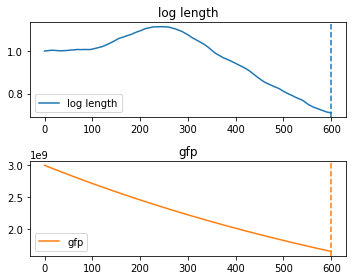

In [48]:
plot_cells(cells_simulated[0], n_steps=1)

In [49]:
cell_sparse = df2cells(dataset)

In [50]:

# =============== PLOT =============== #
def plot_cells_scatter(cells, n_steps=1):
    _, axes = plt.subplots(2, figsize=(5,4))
    ax = axes.ravel()

    for j in range(len(cells[::n_steps])):
        cell = copy.deepcopy(cells[j])
        cell.time = np.array(cell.time)

        if n_steps>1:
            ax[0].set_title("log length (showing every {:d}th cell)".format(n_steps))
            ax[1].set_title("gfp (showing every {:d}th cell)".format(n_steps))

        else:
            ax[0].set_title("log length")
            ax[1].set_title("gfp")

        # ax[0].set_ylim([1.2, 2.2])
        s=2
        if j ==0:
            ax[0].scatter(cell.time, np.array(cell.log_length), label='log length', color='tab:blue',s=s)
            ax[1].scatter(cell.time, np.array(cell.gfp), color='tab:orange', label='gfp',s=s)

        else:
            ax[0].scatter(cell.time, np.array(cell.log_length), color='tab:blue', s=s)
            ax[1].scatter(cell.time, np.array(cell.gfp), color='tab:orange', s=s)

    for j in range(2):
        ax[j].legend()
    plt.tight_layout()

    plt.show()

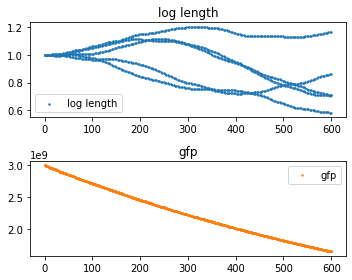

In [51]:
plot_cells_scatter(cell_sparse[:5], n_steps=1)
